<a href="https://colab.research.google.com/github/Ishank2301/Comprehensive-ML-Handbook/blob/main/He_Initialization_Normal_Uniform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries:

In [35]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import seaborn as sns

# Create a valid Dataset:

In [36]:
X, y = make_moons(n_samples=100, noise=0.1, random_state=1)

In [37]:
X.shape

(100, 2)

<Axes: >

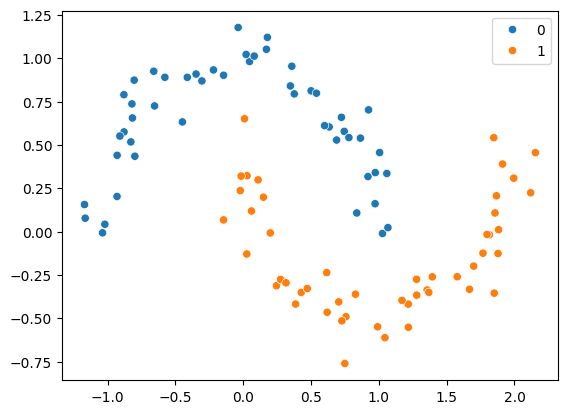

In [38]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

# Create a ANN Model:

# For activation function "Relu":

In [39]:
model = Sequential()

model.add(Dense(10, input_dim=2, activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,  activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,  activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,  activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,  activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,  activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591 (2.31 KB)

 Trainable params: 591 (2.31 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

In [43]:
# Initializng the Model on X,y and validation split of an 20%.
history = model.fit(X, y, validation_split=0.2, epochs=3500, verbose=1,callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.4227 - loss: 0.9488 - val_accuracy: 0.6500 - val_loss: 0.7659
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4617 - loss: 0.8650 - val_accuracy: 0.6500 - val_loss: 0.7444
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4461 - loss: 0.8448 - val_accuracy: 0.6500 - val_loss: 0.7227
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4930 - loss: 0.7705 - val_accuracy: 0.6500 - val_loss: 0.7006
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4773 - loss: 0.7463 - val_accuracy: 0.6500 - val_loss: 0.6805
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5070 - loss: 0.7014 - val_accuracy: 0.6500 - val_loss: 0.6628
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4914 - loss: 0.6929 - val_accuracy: 0.6500 - val_loss: 0.6473
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4547 - loss: 0.6947 - val_accuracy: 0.6500 - 

In [44]:
model.get_weights()

[array([[-0.2763135 , -0.09656461,  0.7613531 , -2.116819  ,  1.3661196 ,
          0.09001129, -1.9464453 ,  0.39733258, -0.29755023, -0.45259538],
        [ 0.28701073,  1.213751  , -0.0296806 , -1.078665  , -1.2814771 ,
          0.39517736, -1.0721848 , -0.37135056,  1.1889344 , -1.917328  ]],
       dtype=float32),
 array([ 0.19896547,  0.10008528,  0.10014159,  0.14823723, -0.20664339,
        -0.13700114, -0.02983125,  0.12563811,  0.04037146,  0.31476754],
       dtype=float32),
 array([[-0.79344654,  0.45203874,  0.34771514, -0.3129724 ,  0.15125763,
         -0.7908975 , -0.21910453, -0.6481541 ,  0.33867687,  0.14271897],
        [-0.41790372, -0.33350223, -0.99361336,  0.7352868 ,  0.01430087,
          0.05952024,  0.04624513, -0.1641931 ,  0.55961144, -0.02243036],
        [-0.14459075,  0.507295  ,  0.26818362, -0.6624653 ,  0.42576218,
          0.79033303, -0.26877496, -0.03181486, -0.30628508, -0.00405603],
        [ 0.27938092,  0.7345881 ,  0.71069205, -0.29887012, 

# Observing the model Data:

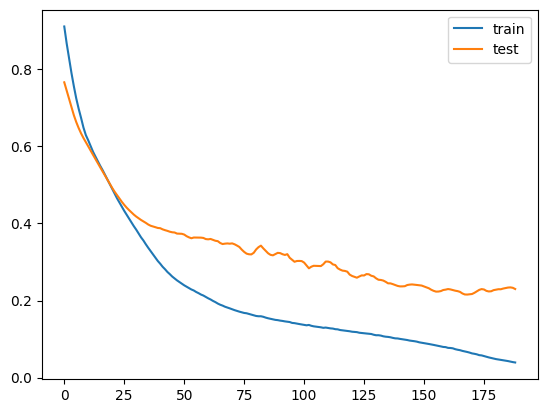

In [45]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


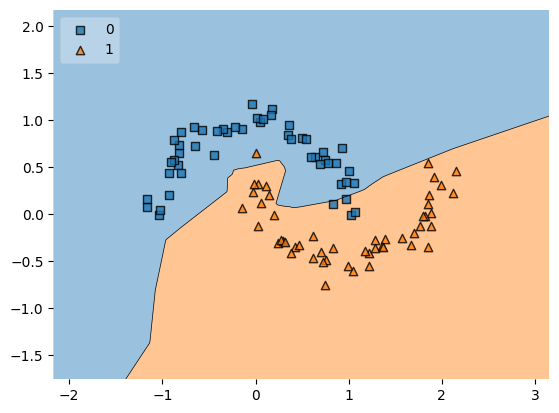

In [46]:
plot_decision_regions(X, y.ravel(), clf = model, legend=2)
plt.show()

As we can see our model has converged faster using the he_normal initializer and the desicion boundary is also not overtrained.

# For activation function "Tanh or Sigmoid":


In [47]:
model = Sequential()

model.add(Dense(10, input_dim=2, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,  activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,  activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,  activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,  activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,  activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

In [48]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591 (2.31 KB)

 Trainable params: 591 (2.31 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

In [50]:
history = model.fit(X,y,validation_split=0.2,epochs=300,callbacks=callback,batch_size=100,verbose=0)

Restoring model weights from the end of the best epoch: 300.


# Observing our models result:

In [51]:
model.get_weights()

[array([[-1.1642419 , -1.4981673 , -0.00901136, -1.2749871 , -0.6616024 ,
         -1.3558642 ,  0.2930976 ,  0.49215224,  0.13010524,  1.1870173 ],
        [ 1.3241657 , -0.66324633, -0.8411506 , -0.15586126,  0.6813988 ,
         -0.5970376 ,  1.6529272 , -1.1149894 , -1.1895998 , -1.0093437 ]],
       dtype=float32),
 array([-0.18905316,  0.02854569, -0.04355666, -0.0270918 ,  0.2226675 ,
        -0.04402403,  0.11843485, -0.09886055, -0.10912166,  0.05224672],
       dtype=float32),
 array([[ 0.31354278,  0.01585922, -0.33345795,  0.5120713 , -0.01933563,
          0.1985881 , -0.3361218 , -0.23494501,  0.48086277,  0.6253585 ],
        [-0.14890477,  0.21826047, -0.19096273,  0.75843406, -0.7644734 ,
          0.35463476, -0.4155457 , -0.03498442,  0.28219914, -0.09314004],
        [-0.6936421 , -0.20357102, -0.5347525 , -0.34092215, -0.6978948 ,
         -0.00797219,  0.26471663,  0.64664435, -0.59923124, -0.14989986],
        [ 0.27482912, -0.45678827,  0.4065783 ,  0.5976372 , 

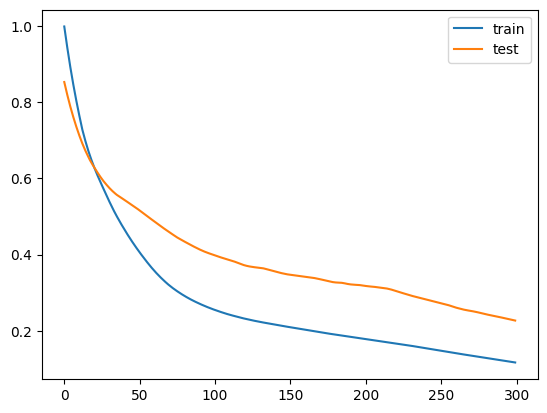

In [52]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


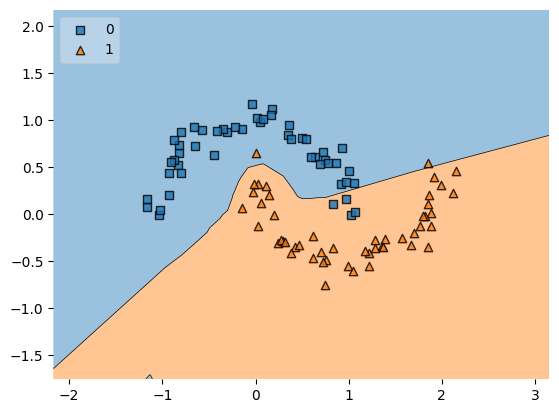

In [53]:
plot_decision_regions(X, y.ravel(), clf = model, legend=2)
plt.show()

I think uniform is more Good
